# Class Session 17 Exercise:
## Comparing the histograms of local clustering coefficients of date hubs and party hubs

load the file of hub types `shared/han_hub_data.txt` (two-column TSV file, first column is the protein name, and second column contains `date` or `party`)

load the file of network edges `shared/han_network_edges.txt` (two-column file, with first column is the first protein in the interacting pair, and the second column is the second protein in the interacting pair)

make an undirected igraph `Graph` from the edgelist data; show summary data on the graph as a sanity-check

IGRAPH UN-- 1344 2523 -- 
+ attr: name (v/c)


get the igraph vertex indexes of the proteins that are date hubs or party hubs; as a sanity check, print out the number of date hubs and party hubs that you find

[1] "number of date hubs: 91"
[1] "number of party hubs: 108"


use the `transitivity` function in igraph to compute the local clustering coefficients for every vertex in the graph; print out the first six components of the vector of data returned, as a sanity check

[1]        NaN 0.66666667 0.05147059 0.68131868        NaN 0.00000000

Plot the histograms of the local clustering coefficients of the "date hubs" and the "party hubs". 

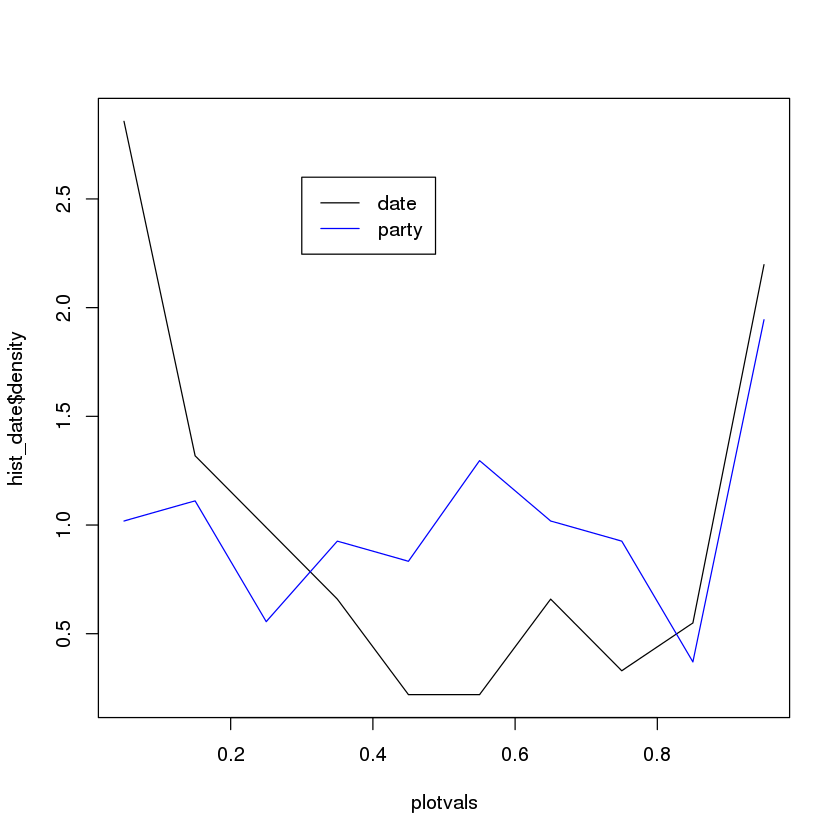